### Lidando com dados faltantes

In [52]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [12]:
csv_data = \
            '''A, B, C, D
            1.0, 2.0, 3.0, 4.0
            5.0, 6.0,, 8.0
            10.0, 11.0, 12.0'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [13]:
df.isnull().sum()

A     0
 B    0
 C    1
 D    1
dtype: int64

In [14]:
# Eliminação
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [15]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [16]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [17]:
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [18]:
df.dropna(subset=['C'])

KeyError: ['C']

### Imputando valores faltantes

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df.values)
imputed_data = imputer.transform(df.values)
imputed_data

In [ ]:
# fillna
df.fillna(df.mean())

### Lidando com dados categóricos

In [ ]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']
])

df.columns = ['color', 'size', 'price', 'classlabel']
df

In [ ]:
X = df[['color', 'size', 'price']].values
ohe = OneHotEncoder()
ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

In [ ]:
X

In [ ]:
X = df[['color', 'size', 'price']].values

C_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0, 1]),
    ('nothing', 'passthrough', [2])
])

C_transf.fit_transform(X).astype(float)

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']])

In [ ]:
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

### Separação em treino e teste

In [19]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [20]:
df_wine.columns= ['Class', 'Alcohol',
                 'Malic acid', 'Ash',
                 'Alcalinity of ash', 'Magnesium',
                 'Total phenols', 'Flavanoids',
                 'Nonflavanoid phenols',
                 'Proanthocyanins', 'Color intensity',
                 'Hue', '0d280/0d315 of diluated wines',
                 'Proline']
print('Labels: ', df_wine['Class'].unique())

Labels:  [1 2 3]


In [21]:
df_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0d280/0d315 of diluated wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=0,
                                                   stratify=y)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 13)
(54, 13)
(124,)
(54,)


### Normalização

In [29]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [38]:
X_train_norm[:3, :1]

array([[0.64619883],
       [0.6871345 ],
       [0.67836257]])

### Importância das *features*

In [49]:
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances) [::-1]

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0d280/0d315 of diluated wines  0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279




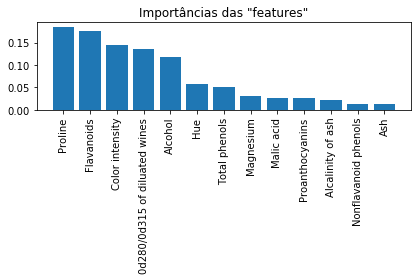

In [51]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, 
                           feat_labels[indices[f]],
                           importances[indices[f]]))
    
    
print('\n')

plt.title('Importâncias das "features"')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       align='center')
plt.xticks(range(X_train.shape[1]),
          feat_labels[indices],
          rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

In [53]:
# Outra técnica
sfm = SelectFromModel(forest,threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)

print('Número de "features" que alcançam o critério limiar',
     'criterion: ', X_selected.shape[1])

Número de "features" que alcançam o critério limiar criterion:  5


In [55]:
for f in range(X_selected.shape[1]):
    print(feat_labels[indices[f]],' - ', importances[indices[f]])

Proline  -  0.18545260453273973
Flavanoids  -  0.17475097557788732
Color intensity  -  0.14391990337231414
0d280/0d315 of diluated wines  -  0.1361619442214559
Alcohol  -  0.11852941731789315
